# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# import dependencies 
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import torch
import time
#agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

In [8]:
def ddpg(n_episodes=1000, max_t=1000, print_every=100):
    """Execute training of Deep Deterministic Policy - DDPQ agent.

    Params
    ======
        n_episodes (int): number of episodes
        max_t (int):      maxiumum number of time steps per episode
        print_every (int): print every interval
        
    """ 
    scores_overall = []
    scores_deque = deque(maxlen=print_every)
    agents = []
    running_avg = [] # get the mean average score
    
    # initiatise
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, num_agents = 1, random_seed=0))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations                # get the current state
        states = np.reshape(states, (1,48))                 # reshape observations to dual, for 2 agents
    
        # reset agents after each episode
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
        start = time.time()
        for t in range(max_t):
            agent_actions = []
            for agent in agents:
                agent_actions.append(agent.act(states, timestep = t))

            actions = np.concatenate((agent_actions[0], agent_actions[1]), axis=0)
            actions = np.reshape(actions, (1, 4))
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations   # get the next state
            next_states = np.reshape(next_states, (1, 48)) 
            
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                  # see if episode has finished
            
            num_agent = 0
            for agent in agents:
                
                agent.step(states, actions, rewards[num_agent], next_states, dones, t, num_agent) # take step with agent (including learning)
                num_agent += 1
            scores += rewards                                # update the score
            states = next_states                             # roll over the state to next time step
            #import ipdb; ipdb.set_trace()
            if np.any(dones):                                       # exit loop if episode finished
                break
                
        score = np.max(scores) # take the max score of the agents
        scores_deque.append(score)       # save most recent score
        scores_overall.append(score)
        running_avg.append(np.mean(scores_deque))
        end = time.time()
        
        print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)), end="")
        print('\rEpisode {}\tAverage Score: {:.4f}\tTime Cost per epi: {:.4f}'.format(i_episode,
                                                                                      np.mean(scores_deque), 
                                                                                      end-start), end="")

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)))
            agent_num = 0
            for agent in agents:
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_' + str(agent_num) + '.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_' + str(agent_num) + '.pth')
                agent_num += 1
        
        if np.mean(scores_deque)>=0.5: # 50% win rate?
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)))
            agent_num = 0
            for agent in agents:
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_' + str(agent_num) + '.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_' + str(agent_num)+ '.pth')
                agent_num += 1
            break
    final_end = time.time()
    print("Total time taken: {:.2f}".format(final_end))
    return scores_overall, running_avg

Episode 100	Average Score: 0.0056	Time Cost per epi: 0.2599
Episode 200	Average Score: 0.0140	Time Cost per epi: 0.2614
Episode 300	Average Score: 0.0416	Time Cost per epi: 0.5335
Episode 400	Average Score: 0.0406	Time Cost per epi: 0.2654
Episode 500	Average Score: 0.0508	Time Cost per epi: 0.2689
Episode 600	Average Score: 0.0890	Time Cost per epi: 1.0100
Episode 700	Average Score: 0.0815	Time Cost per epi: 0.4615
Episode 800	Average Score: 0.1074	Time Cost per epi: 0.2856
Episode 900	Average Score: 0.0934	Time Cost per epi: 0.5590
Episode 1000	Average Score: 0.1013	Time Cost per epi: 0.4645
Episode 1100	Average Score: 0.1185	Time Cost per epi: 0.5471
Episode 1200	Average Score: 0.1485	Time Cost per epi: 0.8374
Episode 1300	Average Score: 0.1603	Time Cost per epi: 0.7556
Episode 1400	Average Score: 0.2321	Time Cost per epi: 1.1219
Episode 1500	Average Score: 0.1265	Time Cost per epi: 0.4712
Episode 1600	Average Score: 0.2429	Time Cost per epi: 0.8579
Episode 1700	Average Score: 0.345

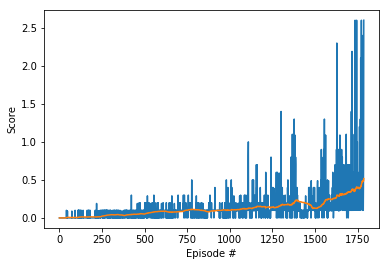

In [9]:

scores, running_avg = ddpg(n_episodes = 3000)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(running_avg)+1), running_avg)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Watch the Agent Perform

In [10]:
%%script false 

from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

agents = []
# initiatise agents
for i in range(num_agents):
    agents.append(Agent(state_size, action_size, num_agents = 1, random_seed=0))

agent_num = 0
for agent in agents:
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor_' + str(agent_num) + '.pth', map_location='cpu'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic_' + str(agent_num) + '.pth', map_location='cpu'))
    agent_num += 1
    
episodes = 1
for i in range(episodes):
    
    act_0 = agents[0].act(states, add_noise=False)
    act_1 = agents[1].act(states, add_noise=False)       
    actions = np.concatenate((act_0, act_1), axis=0) 
    actions = np.reshape(actions, (1, 4))
    env_info = env.step(actions)[brain_name]        
    next_states = env_info.vector_observations        
    next_states = np.reshape(next_states, (1, 48))
    rewards = env_info.rewards                        
    dones = env_info.local_done                 
    states = next_states                              
    if np.any(dones):                              
        break



In [11]:
%%script false 
env.close()